In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df = pd.read_csv(r'C:\Users\PC\OneDrive\Desktop\GDG challenge\EnergyProject\Renewable_Energy_Usage_Sampled.csv')
df= df.drop(columns= ["Household_ID"])

In [44]:
print("Data types for each variable:")
print(df.dtypes)
print()
print("Unique values of each variables:")
print(df.nunique())

Data types for each variable:
Region                object
Country               object
Energy_Source         object
Monthly_Usage_kWh    float64
Year                   int64
Household_Size         int64
Income_Level          object
Urban_Rural           object
Adoption_Year          int64
Subsidy_Received      object
Cost_Savings_USD     float64
dtype: object

Unique values of each variables:
Region                 6
Country               25
Energy_Source          5
Monthly_Usage_kWh    995
Year                   5
Household_Size         8
Income_Level           3
Urban_Rural            2
Adoption_Year         15
Subsidy_Received       2
Cost_Savings_USD     989
dtype: int64


For nominal variables (Income_level): label encoding, else: one hot encoding

For Country & Region, each has a large number of unique values, with respect to 25 and 6

=> considering if we keep or remove these two to avoid high dimensionality

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

# Columns to exclude from Label Encoding
excluded_cols = ["Energy_Source", "Urban_Rural", "Subsidy_Received","Income_Level"]


df['Income_Level'] = df['Income_Level'].map({'Low': 0, 'Middle': 1, 'High': 2})

# One-Hot Encode
df = pd.get_dummies(df, columns=["Energy_Source"], drop_first=True)
df = pd.get_dummies(df, columns=["Urban_Rural"], drop_first=True)
df = pd.get_dummies(df, columns=["Subsidy_Received"], drop_first=True)

# Optional: check result
print(df.head())
print(df.info())



          Region    Country  Monthly_Usage_kWh  Year  Household_Size  \
0  North America        USA            1043.49  2024               5   
1      Australia  Australia             610.01  2024               4   
2  North America        USA            1196.75  2024               8   
3  South America   Colombia             629.67  2024               7   
4         Africa      Egypt             274.46  2022               7   

   Income_Level  Adoption_Year  Cost_Savings_USD  Energy_Source_Geothermal  \
0             0           2012             10.46                     False   
1             2           2023             43.49                      True   
2             0           2017             93.28                     False   
3             2           2023            472.85                     False   
4             1           2010             65.98                     False   

   Energy_Source_Hydro  Energy_Source_Solar  Energy_Source_Wind  \
0                 True         

In [46]:
print(df["Income_Level"].unique())

[0 2 1]


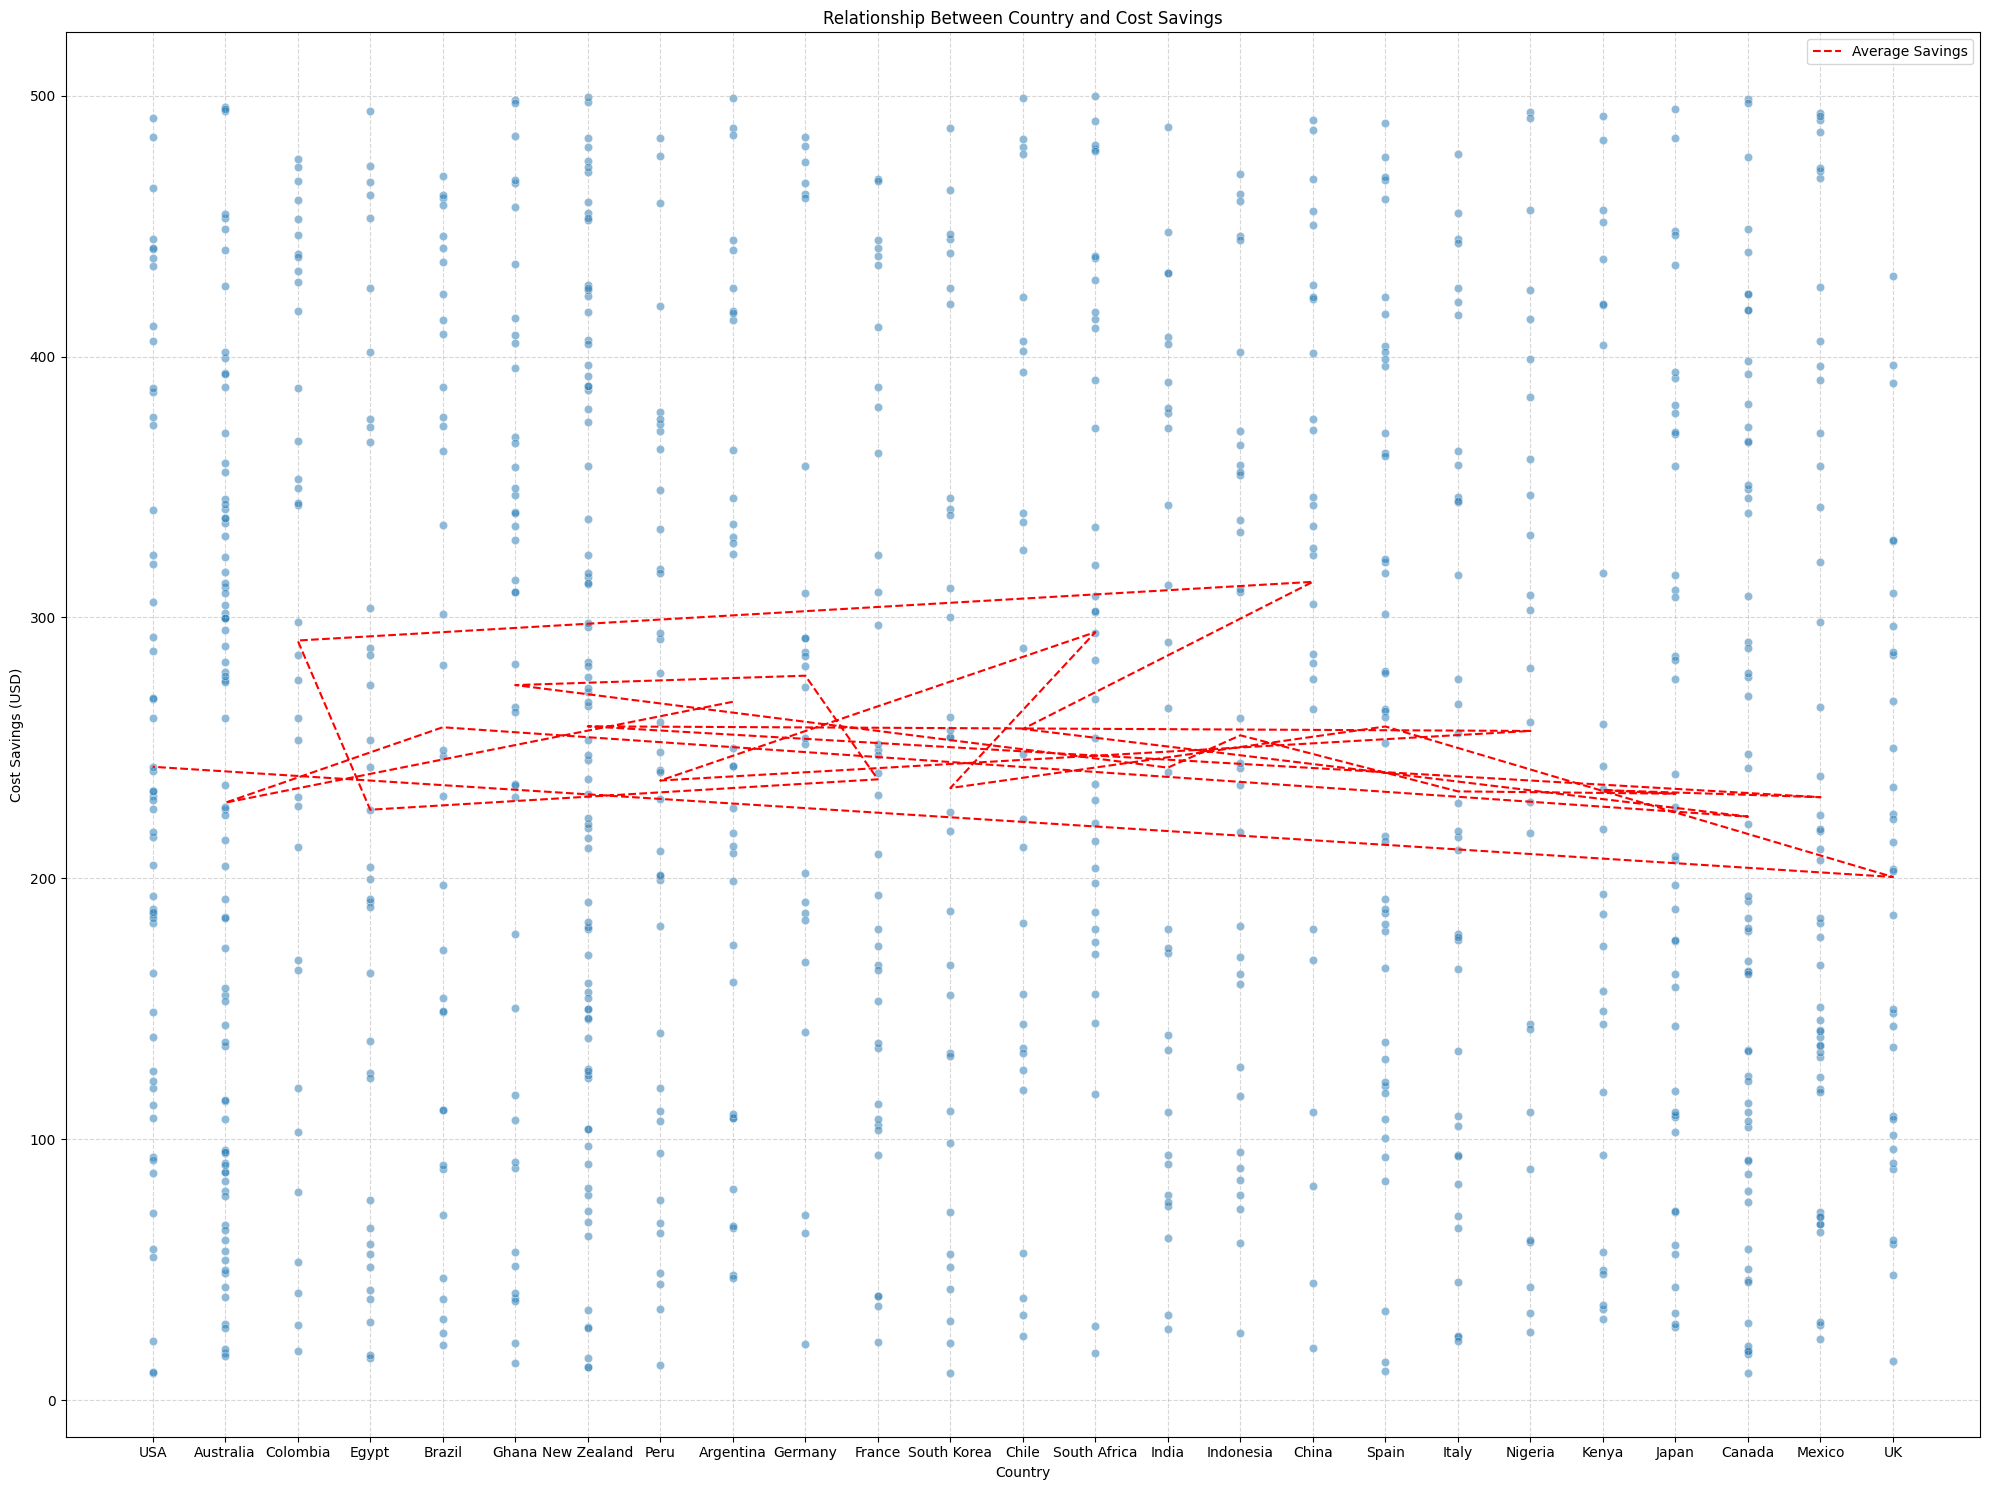

In [47]:
plt.figure(figsize=(20, 15))
plt.scatter(df['Country'], df['Cost_Savings_USD'], alpha=0.5, edgecolors='w', linewidth=0.5)
avg_savings_by_regions = df.groupby('Country')['Cost_Savings_USD'].mean().reset_index()
plt.plot(avg_savings_by_regions['Country'], avg_savings_by_regions['Cost_Savings_USD'], color='red', linestyle='--', label='Average Savings')
plt.title('Relationship Between Country and Cost Savings')
plt.xlabel('Country')
plt.ylabel('Cost Savings (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The range of cost savings considering every country is (200, 310)

=> can keep for further insights but keep it raw

If using one hot encoding => high dimensionality

if using label encoding => assign numerical significance to categorical variables

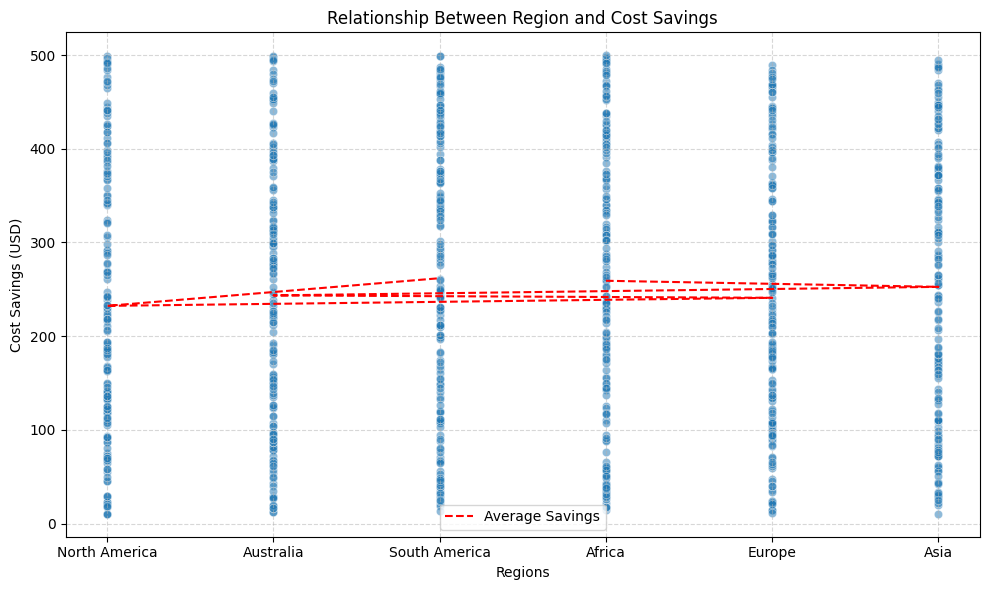

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Region'], df['Cost_Savings_USD'], alpha=0.5, edgecolors='w', linewidth=0.5)
avg_savings_by_regions = df.groupby('Region')['Cost_Savings_USD'].mean().reset_index()
plt.plot(avg_savings_by_regions['Region'], avg_savings_by_regions['Cost_Savings_USD'], color='red', linestyle='--', label='Average Savings')
plt.title('Relationship Between Region and Cost Savings')
plt.xlabel('Regions')
plt.ylabel('Cost Savings (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The graph barely illustrates any significance among cost savings of regions => can remove Region

Families at South Africa & Africa have the tendency to save more money using renewable energy, but the difference among other regions is not considerable

Covariance matrix:


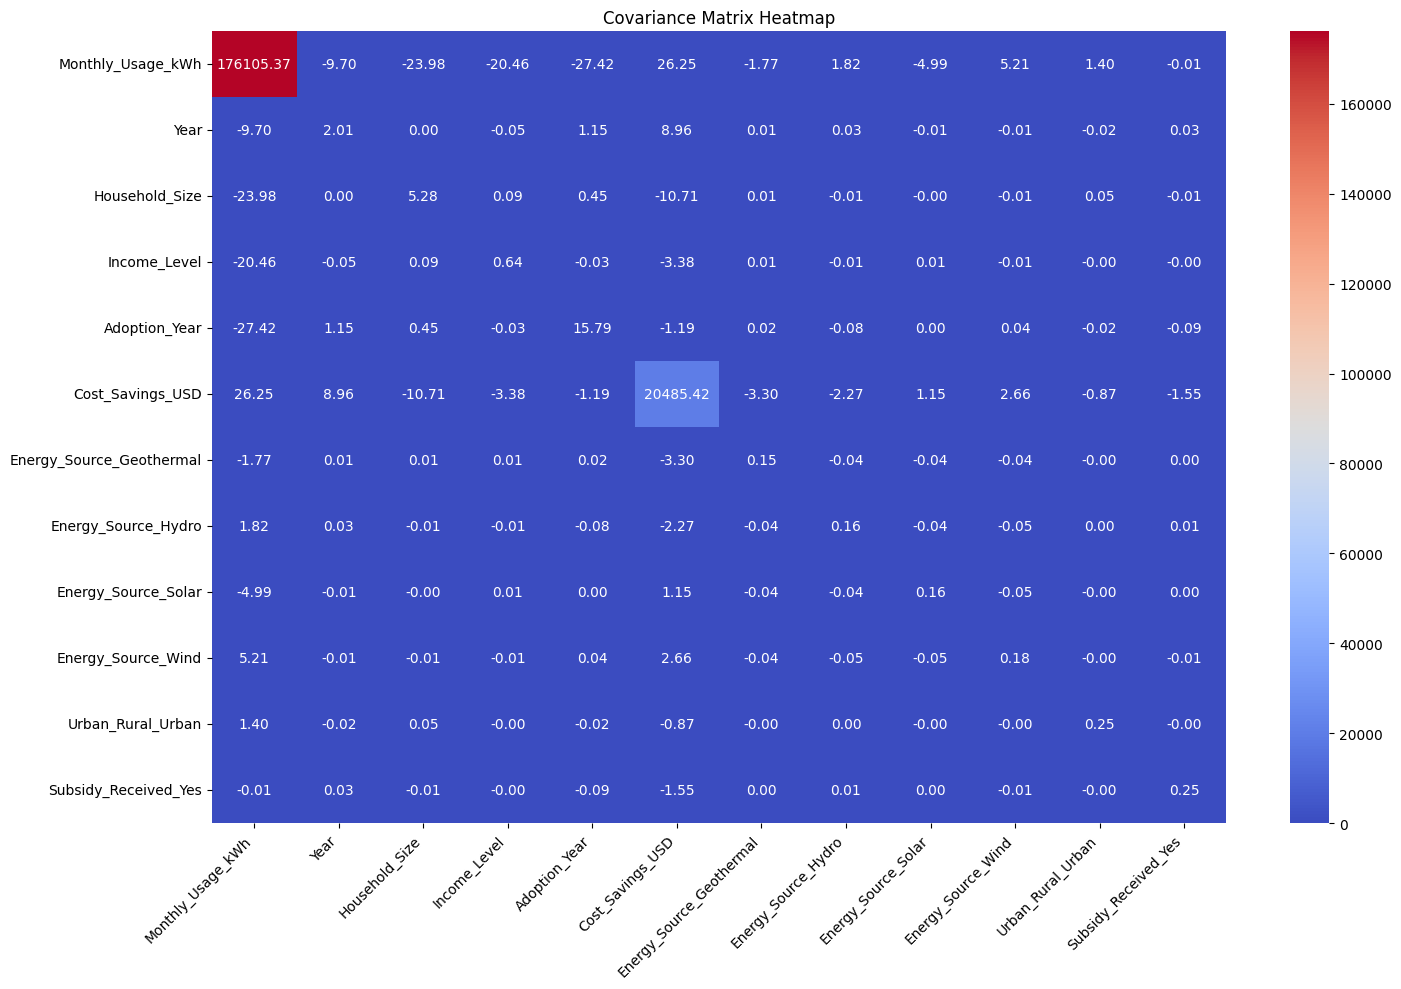

Correlation matrix:


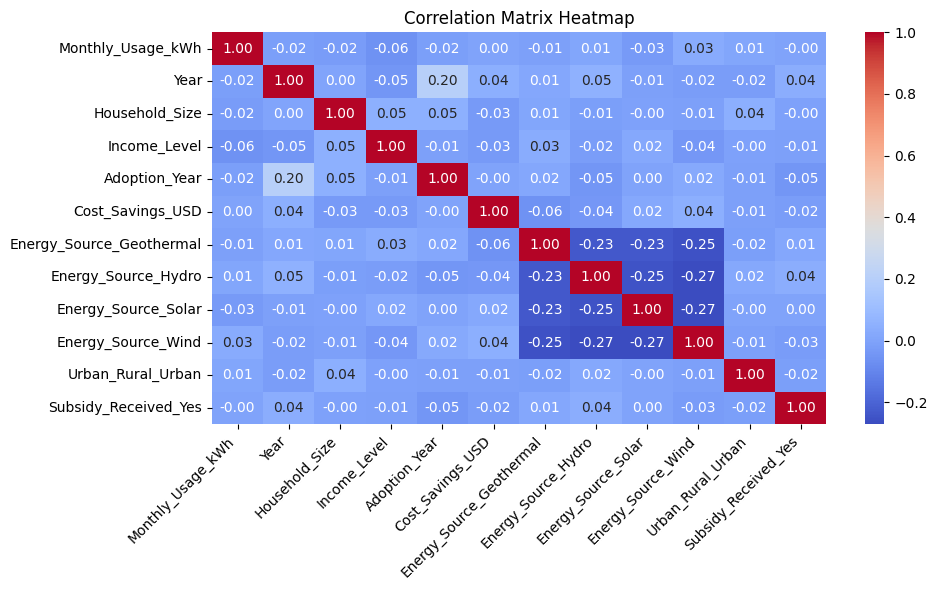

In [49]:
# Covariance matrix including categorical feature
print("Covariance matrix:")
heh= df.drop(columns= ["Country","Region"])
covar_matrix= heh.cov()
plt.figure(figsize=(15, 10))
sns.heatmap(covar_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Covariance Matrix Heatmap")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better fit
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()     
plt.show()


# Correlation matrix including categorical feature
print("Correlation matrix:")
corr_matrix= heh.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better fit
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()     
plt.show()

From 2 figures we can see that the relationships among variables are weak (Values in the correlation matrix is near to 0)
=> can be affected by other factors

In [50]:
df= df.drop(columns= ["Region"])
df.to_csv("cleaned_data.csv")